<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>Coursera Capstone Project - Report</font></h1>

### Import necessary Libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analysis
import numpy as np # library to handle data in a vectorized manner
import json
import folium # plotting library
import geopandas as gpd
import matplotlib.pyplot as plt
import time

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
from pykml.factory import KML_ElementMaker as KML
from fastkml import  kml    
from pandas.io.json import json_normalize # tranforming json file into a pandas dataframe library
from shapely.geometry import Point, Polygon
from matplotlib.ticker import PercentFormatter
from folium import plugins
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.preprocessing import StandardScaler

print('Libraries imported.')

Unable to open EPSG support file gcs.csv.  Try setting the GDAL_DATA environment variable to point to the directory containing EPSG csv files.

Bad key "text.kerning_factor" on line 4 in
D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


Libraries imported.


##### Make sure that you have created a Foursquare developer account and have your credentials handy

In [2]:
CLIENT_ID = '2PXGMUJF0IOVFDI2WCRNW5BCL325Y3GRQNRJMFKH4JWLDE4Z' # your Foursquare ID
CLIENT_SECRET = 'C4WKMAS3XK2KUGN42N2D5WNLN1LOH3VEB4Z1V44GX0JATRZD' # your Foursquare Secret
CLIENT_ID2 = 'DTYG00XCIBCT3THOYKSW1S1DYYDP0EG5VCYKAXX3DCG2OFTA' # your Foursquare ID
CLIENT_SECRET2 = 'QSS453M4WK5212C42B4MDZ4ZU3ZWVMGYB4EPS2PITA3IUQ1N' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100

In [3]:
address = 'Singapore'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
radius = 3000

## 1. Search for a specific venue category
> `https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&query=`**QUERY**`&radius=`**RADIUS**`&limit=`**LIMIT**

In [4]:
df = pd.read_csv('mrt_lrt_data.csv')

In [5]:
outdoor='4d4b7105d754a06377d81259'
#building='4bf58dd8d48988d130941735'
businesscenter='56aa371be4b08b9a8d573517' #done
office='4bf58dd8d48988d124941735'  #done
shops='4d4b7105d754a06378d81259' #done
outletmall='5744ccdfe4b0c0459246b4df'
shopmall='4bf58dd8d48988d1fd941735'  #done
shopplaza='5744ccdfe4b0c0459246b4dc'
entertm='4d4b7104d754a06370d81259' #done
nightlife='4d4b7105d754a06376d81259' #done
food= '4d4b7105d754a06374d81259' 

a=1.33594
b=103.888

In [237]:
#test
rngurl = 'https://api.foursquare.com//v2/venues/search?categoryId={}&client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(shops,CLIENT_ID2, CLIENT_SECRET2,a,b,VERSION, radius, LIMIT)
trial2 = requests.get(rngurl).json()
#print("Completed : %s " % label)
trial3=trial2['response']['venues']
trial4=pd.DataFrame(trial3)
trial4

,id,name,location,categories,referralId,hasPerk
0,58afd9392bc5e234b9f7caf7,18 Tai Seng,"{'address': '18 Tai Seng Street', 'lat': 1.336...","[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",v-1590052015,False
1,4e773c3ba809582dd6b696a7,Xpressflower.com (nex),"{'address': '23 Serangoon Central #03-04', 'la...","[{'id': '4bf58dd8d48988d11b951735', 'name': 'F...",v-1590052015,False
2,4d20728bdd6a236a948a3738,SK Jewellery @ Nex,"{'lat': 1.3478286425017838, 'lng': 103.8717843...","[{'id': '4bf58dd8d48988d111951735', 'name': 'J...",v-1590052015,False


In [123]:
enter1=[]

for lat, long,label in zip(df.lat,df.lng,df.station_name):
         
    entertm='5744ccdfe4b0c0459246b4dc' #shopping plaza
    enturl = 'https://api.foursquare.com/v2/venues/search?categoryId={}&client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format( entertm, CLIENT_ID2, CLIENT_SECRET2, lat, long, VERSION,radius, LIMIT)
    entenq = requests.get(enturl).json()
    print("Completed : {}".format(label))
    ent = entenq['response']['venues']
    enter1 += ent
    break #try before official call it
    

Completed : Jurong East
Completed : Bukit Batok
Completed : Bukit Gombak
Completed : Choa Chu Kang
Completed : Yew Tee
Completed : Kranji
Completed : Marsiling
Completed : Woodlands
Completed : Admiralty
Completed : Sembawang
Completed : Yishun
Completed : Khatib
Completed : Yio Chu Kang
Completed : Ang Mo Kio
Completed : Bishan
Completed : Braddell
Completed : Toa Payoh
Completed : Novena
Completed : Newton
Completed : Orchard
Completed : Somerset
Completed : Dhoby Ghaut
Completed : City Hall
Completed : Raffles Place
Completed : Marina Bay
Completed : Marina South Pier
Completed : Tuas Link
Completed : Tuas West Road
Completed : Tuas Crescent
Completed : Gul Circle
Completed : Joo Koon
Completed : Pioneer
Completed : Boon Lay
Completed : Lakeside
Completed : Chinese Garden
Completed : Clementi
Completed : Dover
Completed : Buona Vista
Completed : Commonwealth
Completed : Queenstown
Completed : Redhill
Completed : Tiong Bahru
Completed : Outram Park
Completed : Tanjong Pagar
Completed

In [125]:
enter2=pd.DataFrame(enter1)
enter2.drop(['referralId','hasPerk'],axis=1,inplace=True)
enter2=enter2.drop_duplicates(subset='id')
enter2

,id,name,location,categories
0,5cbd90a22619ee002c183f32,Huawei,"{'address': 'Westgate', 'lat': 1.334273, 'lng'...","[{'id': '4f04afc02fb6e1c99f3db0bc', 'name': 'M..."
1,5c4d27dd4940bc002c208ab5,Jurong Central Plaza,"{'lat': 1.348974, 'lng': 103.724817, 'labeledL...","[{'id': '5744ccdfe4b0c0459246b4dc', 'name': 'S..."
2,4b5aaef4f964a520b5d028e3,Teban Place,"{'address': '61 Teban Gardens Road', 'lat': 1....","[{'id': '5744ccdfe4b0c0459246b4dc', 'name': 'S..."
5,5a6dd4dc48b04e70ed354a17,Hillion Mall Lalu,"{'address': '#B1-11/12/13/14', 'lat': 1.378322...","[{'id': '5744ccdfe4b0c0459246b4dc', 'name': 'S..."
11,5954764195a722575feb9ca8,Wisma Vasty,"{'address': '37, Jalan Meldrum', 'lat': 1.4599...","[{'id': '5744ccdfe4b0c0459246b4dc', 'name': 'S..."
12,4b058817f964a5203cb122e3,Woodlands Mart,"{'address': '768 Woodlands Ave 6', 'crossStree...","[{'id': '5744ccdfe4b0c0459246b4dc', 'name': 'S..."
16,5be552a91af852002c53b9c3,Nomadx,"{'lat': 1.299343, 'lng': 103.845272, 'labeledL...","[{'id': '5744ccdfe4b0c0459246b4dc', 'name': 'S..."
17,59c5f6892079556b58efcc16,Issey Miyake,"{'lat': 1.302878, 'lng': 103.834989, 'labeledL...","[{'id': '5744ccdfe4b0c0459246b4dc', 'name': 'S..."
18,4b8f987ef964a520575933e3,Hylam Street @ Bugis Junction,"{'address': '200 North Bridge Rd', 'lat': 1.29...","[{'id': '5744ccdfe4b0c0459246b4dc', 'name': 'S..."
19,5b357b932f97ec0039400bcc,H&M Orchard Building,"{'crossStreet': 'Grange Road', 'lat': 1.300650...","[{'id': '5744ccdfe4b0c0459246b4dc', 'name': 'S..."


In [126]:
enterloc=enter2.location
enterloc=enterloc.to_dict()
enterloc=pd.DataFrame(enterloc)
enterloc=enterloc.T
enterloc.drop(columns={'labeledLatLngs','distance','postalCode','state','crossStreet'},inplace=True)
enterloc

,address,lat,lng,cc,city,country,formattedAddress
0,Westgate,1.33427,103.743,SG,Jurong Town,Singapore,"[Westgate, 608531, Singapore]"
1,NaN,1.34897,103.725,SG,Jurong Town,Singapore,"[640493, Singapore]"
2,61 Teban Gardens Road,1.32223,103.739,SG,Singapore,Singapore,"[61 Teban Gardens Road, Singapore]"
5,#B1-11/12/13/14,1.37832,103.763,SG,Singapore,Singapore,"[#B1-11/12/13/14, 670227, Singapore]"
11,"37, Jalan Meldrum",1.45993,103.765,MY,Johor Bahru,Malaysia,"[37, Jalan Meldrum, 80000 Johor Bahru, Johor, ..."
12,768 Woodlands Ave 6,1.44587,103.799,SG,Singapore,Singapore,"[768 Woodlands Ave 6 (Woodlands Dr 61), 730768..."
16,NaN,1.29934,103.845,SG,Dhoby Ghaut,Singapore,"[238890, Singapore]"
17,NaN,1.30288,103.835,SG,Orchard,Singapore,"[238872, Singapore]"
18,200 North Bridge Rd,1.29942,103.856,SG,City,Singapore,"[200 North Bridge Rd, Singapore]"
19,NaN,1.30065,103.837,SG,Singapore,Singapore,"[Grange Road, 238165, Singapore]"


In [127]:
entercat=enter2.categories
entercat=entercat.to_dict()
entercat = pd.DataFrame.from_dict(entercat, orient='index')
entercat=entercat[0].to_dict()
entercat=pd.DataFrame(entercat)
entercat=entercat.T
entercat.drop(columns={'id','name','pluralName','icon','primary'},inplace=True)
entercat

,shortName
0,Mobile Phones
1,Shopping Plaza
2,Shopping Plaza
5,Shopping Plaza
11,Shopping Plaza
12,Shopping Plaza
16,Shopping Plaza
17,Shopping Plaza
18,Shopping Plaza
19,Shopping Plaza


In [128]:
enter3 = pd.concat([enter2,enterloc,entercat], axis=1)
enter3.drop(['categories','address','location','country','city','formattedAddress'],axis=1,inplace=True)
enter3=enter3[(enter3.cc!='MY')]
enter3

,id,name,lat,lng,cc,shortName
0,5cbd90a22619ee002c183f32,Huawei,1.33427,103.743,SG,Mobile Phones
1,5c4d27dd4940bc002c208ab5,Jurong Central Plaza,1.34897,103.725,SG,Shopping Plaza
2,4b5aaef4f964a520b5d028e3,Teban Place,1.32223,103.739,SG,Shopping Plaza
5,5a6dd4dc48b04e70ed354a17,Hillion Mall Lalu,1.37832,103.763,SG,Shopping Plaza
12,4b058817f964a5203cb122e3,Woodlands Mart,1.44587,103.799,SG,Shopping Plaza
16,5be552a91af852002c53b9c3,Nomadx,1.29934,103.845,SG,Shopping Plaza
17,59c5f6892079556b58efcc16,Issey Miyake,1.30288,103.835,SG,Shopping Plaza
18,4b8f987ef964a520575933e3,Hylam Street @ Bugis Junction,1.29942,103.856,SG,Shopping Plaza
19,5b357b932f97ec0039400bcc,H&M Orchard Building,1.30065,103.837,SG,Shopping Plaza
20,4c384f3e93db0f474f592192,Bugis Street,1.30054,103.855,SG,Shopping Plaza


In [129]:
enter3.to_csv('8 - shopping plaza.csv')

In [ ]:
alpha1=[]
search_query='restaurant'
for lat, long,label in zip(df['lat'],df['lng'],df['station_name']):
  
        rngurl = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, long, VERSION, search_query, radius, LIMIT)
        results = requests.get(rngurl).json()
        print("Completed : {}, url:{}".format(label,rngurl))
        test1=results['response']['venues']
        # assign relevant part of JSON to venues
        #venues = results['response']['venues']
        alpha1+=test1
        break


In [ ]:
test3=pd.DataFrame(alpha1)
print(test3.shape)
test3

In [ ]:
res1=test3.drop_duplicates(subset='id')
res1.drop(columns={'referralId','hasPerk','venuePage'},inplace=True)
res1

In [ ]:
resloc=res1.location
resloc=resloc.to_dict()
resloc=pd.DataFrame(resloc)
resloc=resloc.T
resloc

In [ ]:
rescat=res1.categories
rescat=rescat.to_dict()
rescat = pd.DataFrame.from_dict(rescat, orient='index')
rescat=rescat[0].to_dict()
rescat=pd.DataFrame(rescat)
rescat=rescat.T
rescat.drop(columns={'id','name','pluralName','icon','primary'},inplace=True)
rescat

In [ ]:
res2 = pd.concat([res1,resloc,rescat],axis=1)
res2.drop(['categories','address','location','country','distance','crossStreet','state',
           'postalCode','id','labeledLatLngs','formattedAddress'],axis=1,inplace=True)
res2=res2[(res2.cc!='MY')]
res2

In [ ]:
res2.to_csv('3 - restaurantlist.csv')

In [39]:
data=pd.read_csv('3 - restaurantlist.csv',index_col='Unnamed: 0')
data

,name,lat,lng,cc,city,neighborhood,shortName
0,Beng Hiang Restaurant,1.333945,103.740333,SG,Singapore,JURONG EAST,Chinese
1,White Restaurant 三巴旺白米粉 (White Restaurant),1.335406,103.746238,SG,Singapore,JURONG EAST,Chinese
2,Enaq Restaurant,1.344777,103.735175,SG,Singapore,JURONG EAST,Indian
3,Xiang Ji Seafood and Steamboat Restaurant,1.336477,103.743038,SG,Singapore,JURONG EAST,Chinese
4,Soup Restaurant Teahouse 三盅兩件茶楼,1.334393,103.746033,SG,Singapore,JURONG EAST,Chinese
...,...,...,...,...,...,...,...
6838,Rakuichi Japanese Restaurant,1.387529,103.869445,SG,Singapore,SERANGOON,Japanese
6840,Di Wei Teochew Restaurant,1.407455,103.868010,SG,NaN,SELETAR,Chinese
6842,Fu Seafood Restaurant,1.386282,103.873474,SG,NaN,SERANGOON,Seafood
7439,Kampong Chai Chee Restaurant,1.421093,103.911881,SG,Singapore,PUNGGOL,Halal


In [40]:
edit = {'Turkish':'Middle Eastern','Modern European':'European','German':'European','Portuguese':'European','Seafood':'Chinese',
     'French':'European','BBQ':'Chinese','Cocktail':'European','Cuban':'Caribbean','Cantonese':'Chinese','Cafeteria':'Food Court',
     'Cajun / Creole':'Food Court','Deli / Bodega':'European','Italian':'Mediterranean','Spanish':'Mediterranean','Pub':'Bar',
     'South Indian':'Indian','Lebanese':'Middle Eastern','Dim Sum':'Chinese','Falafel':'Middle Eastern', 'Seafood':'Chinese',
     'Molecular Gastronomy':'Middle Eastern','Comfort Food':'European','Tea Room':'Food Court','Shabu-Shabu':'Japanese',
     'Other Outdoors':'Food Court','Food & Drink':'Chinese','Halal':'Malay','Gourmet':'Malay','Fried Chicken':'Filipino',
     'Hotpot':'Chinese','North Indian':'Indian','Indian Chinese':'Manchu','Beijing': 'Chinese','Cha Chaan Teng':'Chinese',
     'Hainan':'Chinese','Arcade':'Indian','Winery':'Bar','Hong Kong':'Chinese','Shanghai':'Chinese','Peking Duck':'Chinese',
     'Szechuan':'Chinese','Dongbei':'Chinese','Dumplings':'Chinese','Sushi':'Japanese','Japanese Curry':'Japanese',
     'Bistro':'Bar','Beer Garden':'Bar','Brewery':'Bar','Pub':'Bar','Café':'European','Noodles':'Japanese','Soup':'Chinese',
     'Coffee Shop':'Chinese','Breakfast':'Chinese','Restaurant':'European','Afghan':'European','Diner':'Korean','Food':'Malay',
     'Asian':'Chinese','Pakistani':'Middle Eastern','Scandinavian':'European','Swiss':'European','American':'European',
     'Steakhouse':'Bar','Vegetarian / Vegan':'Chinese','Greek':'Mediterranean'}
res2 = data.replace(edit)
res2

,name,lat,lng,cc,city,neighborhood,shortName
0,Beng Hiang Restaurant,1.333945,103.740333,SG,Singapore,JURONG EAST,Chinese
1,White Restaurant 三巴旺白米粉 (White Restaurant),1.335406,103.746238,SG,Singapore,JURONG EAST,Chinese
2,Enaq Restaurant,1.344777,103.735175,SG,Singapore,JURONG EAST,Indian
3,Xiang Ji Seafood and Steamboat Restaurant,1.336477,103.743038,SG,Singapore,JURONG EAST,Chinese
4,Soup Restaurant Teahouse 三盅兩件茶楼,1.334393,103.746033,SG,Singapore,JURONG EAST,Chinese
...,...,...,...,...,...,...,...
6838,Rakuichi Japanese Restaurant,1.387529,103.869445,SG,Singapore,SERANGOON,Japanese
6840,Di Wei Teochew Restaurant,1.407455,103.868010,SG,NaN,SELETAR,Chinese
6842,Fu Seafood Restaurant,1.386282,103.873474,SG,NaN,SERANGOON,Chinese
7439,Kampong Chai Chee Restaurant,1.421093,103.911881,SG,Singapore,PUNGGOL,Malay


In [41]:
res2=res2[(res2.shortName!='Arepas')&(res2.shortName!='Burgers')&(res2.shortName!='Eastern European')&
              (res2.shortName!='Gay Bar')&(res2.shortName!='Mac & Cheese')&(res2.shortName!='New American')&
              (res2.shortName!='Event Space')&(res2.shortName!='Office')&(res2.shortName!='Park')&
              (res2.shortName!='Entertainment')&(res2.shortName!='Parking')&(res2.shortName!='Metro')&
              (res2.shortName!='Factory')&(res2.shortName!='Technology')&(res2.shortName!='Fast Food')&
              (res2.shortName!='African')&(res2.shortName!='Food Court')&(res2.shortName.notna())]
res2

,name,lat,lng,cc,city,neighborhood,shortName
0,Beng Hiang Restaurant,1.333945,103.740333,SG,Singapore,JURONG EAST,Chinese
1,White Restaurant 三巴旺白米粉 (White Restaurant),1.335406,103.746238,SG,Singapore,JURONG EAST,Chinese
2,Enaq Restaurant,1.344777,103.735175,SG,Singapore,JURONG EAST,Indian
3,Xiang Ji Seafood and Steamboat Restaurant,1.336477,103.743038,SG,Singapore,JURONG EAST,Chinese
4,Soup Restaurant Teahouse 三盅兩件茶楼,1.334393,103.746033,SG,Singapore,JURONG EAST,Chinese
...,...,...,...,...,...,...,...
6838,Rakuichi Japanese Restaurant,1.387529,103.869445,SG,Singapore,SERANGOON,Japanese
6840,Di Wei Teochew Restaurant,1.407455,103.868010,SG,NaN,SELETAR,Chinese
6842,Fu Seafood Restaurant,1.386282,103.873474,SG,NaN,SERANGOON,Chinese
7439,Kampong Chai Chee Restaurant,1.421093,103.911881,SG,Singapore,PUNGGOL,Malay


In [158]:
rescount=res2.groupby(['shortName']).count()
rescount

,name,lat,lng,cc,city,neighborhood
shortName,,,,,,
Bar,28,28,28,28,25,1
Buffet,6,6,6,6,5,0
Caribbean,2,2,2,2,1,0
Chinese,546,546,546,546,389,52
European,71,71,71,71,45,5
Filipino,3,3,3,3,2,0
Indian,178,178,178,178,127,22
Indonesian,9,9,9,9,6,0
Japanese,120,120,120,120,93,12


In [42]:
#map all the shops in Singapore and by clusterse
def mapping(target,latitude,longitude):
# let's start again with a clean copy of the map of Singapore
    venues_map = folium.Map(location=[latitude, longitude], zoom_start=11)
    # instantiate a mark cluster object for the incidents in the dataframe
    summary = plugins.MarkerCluster().add_to(venues_map)
    # loop through the dataframe and add each data point to the mark cluster
    for lat, lng, label, in zip(target.lat, target.lng, target.shortName):
        folium.Marker(
            location=[lat, lng],
            icon=None,
            popup=label,
        ).add_to(summary)
    return venues_map

In [43]:
mapping(res2,latitude,longitude)

In [16]:
fp = r'Constituency.geojson'
par = r'planning_area.geojson'
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [17]:
plnarea="planning area.kml"
pa = gpd.read_file(plnarea, driver='KML')
pa['Center']=pa.geometry.centroid
pa['lat']=pa.geometry.centroid.y
pa['lng']=pa.geometry.centroid.x

In [178]:
business=pd.read_csv('1 - busi.csv',index_col='Unnamed: 0')
nightlife=pd.read_csv('2 - nightlife.csv',index_col='Unnamed: 0')
restaurant=pd.read_csv('3 - restaurantlist.csv',index_col='Unnamed: 0')
shops=pd.read_csv('4 - shops.csv',index_col='Unnamed: 0')
shoppingmall=pd.read_csv('5 - shoppingmall.csv',index_col='Unnamed: 0')
office=pd.read_csv('6 - office.csv',index_col='Unnamed: 0')
entertainment=pd.read_csv('7 - entertainment.csv',index_col='Unnamed: 0')
shoppingplaza=pd.read_csv('8 - shopping plaza.csv',index_col='Unnamed: 0')

In [206]:
#label all the shops into the planning area it is in
def districtlabel (target,checkarea):
    for lat, lng, label, in zip(target.lng, target.lat, target.index):
        for area, name, in zip(checkarea.geometry, checkarea.Name):
            point=Point(lat,lng)
            if point.within(area):
                target.loc[label,"neighborhood"]=name
            else:
                pass

In [181]:
districtlabel(business,pa)
districtlabel(nightlife,pa)
districtlabel(restaurant,pa)
districtlabel(shops,pa)
districtlabel(shoppingmall,pa)
districtlabel(office,pa)
districtlabel(entertainment,pa)
districtlabel(shoppingplaza,pa)

In [210]:
work=pd.concat([business,office],axis=0)
work=work.drop_duplicates(subset='id')
work.drop(columns='id',inplace=True)

In [203]:
shoplots=pd.concat([shoppingmall,shoppingplaza,shops],axis=0)
shoplots=shoplots.drop_duplicates(subset='id')
shoplots.drop(columns='id',inplace=True)

In [205]:
fun=pd.concat([entertainment,nightlife],axis=0)
fun=fun.drop_duplicates(subset='id')
fun.drop(columns='id',inplace=True)

In [376]:
work.to_csv('10 - Workplace.csv')
fun.to_csv('11 - Fun.csv')
restaurant.to_csv('12 - restaurant.csv')
shoplots.to_csv('13 - shoplots.csv')

In [375]:
restaurant.rename(columns={'name':'Restaurant'},inplace=True)
fun.rename(columns={'name':'Fun'},inplace=True)
shoplots.rename(columns={'name':'Shoplots'},inplace=True)
work.rename(columns={'name':'Workplace'},inplace=True)

In [8]:
work=pd.read_csv('10 - Workplace.csv',index_col='Unnamed: 0')
fun=pd.read_csv('11 - Fun.csv',index_col='Unnamed: 0')
restaurant=pd.read_csv('12 - restaurant.csv',index_col='Unnamed: 0')
shoplots=pd.read_csv('13 - shoplots.csv',index_col='Unnamed: 0')

In [9]:
resgr=restaurant.groupby(['neighborhood']).count()
fungr=fun.groupby(['neighborhood']).count()
shopgr=shoplots.groupby(['neighborhood']).count()
workgr=work.groupby(['neighborhood']).count()

In [10]:
combi=pd.concat([resgr.Restaurant,fungr.Fun,shopgr.Shoplots,workgr.Workplace],axis=1)
combi=combi.fillna(0)
combi

,Restaurant,Fun,Shoplots,Workplace
ANG MO KIO,33.0,42.0,34.0,38.0
BEDOK,83.0,68.0,33.0,29.0
BISHAN,22.0,27.0,17.0,16.0
BOON LAY,1.0,10.0,9.0,11.0
BUKIT BATOK,40.0,43.0,25.0,41.0
BUKIT MERAH,42.0,71.0,39.0,39.0
BUKIT PANJANG,13.0,33.0,25.0,15.0
BUKIT TIMAH,47.0,44.0,31.0,18.0
CENTRAL WATER CATCHMENT,1.0,8.0,0.0,3.0
CHANGI,22.0,48.0,41.0,40.0


In [11]:
typ=pd.read_csv('resident-population-by-planning-area-and-type-of-dwelling.csv')
typ.level_2=typ.level_2.str.upper()

In [12]:
pops=typ.pivot_table(index='level_2',columns='level_1',values='value')
pops.drop(['Total','HDB Dwellings - 1- And 2-Room Flats','HDB Dwellings - 3-Room Flats',
        'HDB Dwellings - 4-Room Flats','HDB Dwellings - 5-Room And Executive Flats'],axis=1,inplace=True)
pops.rename(columns={'Condo- Miniums And Other Apartments':'Condo',
                     'HDB Dwellings - Total HDB':'HDB','Landed Properties':'Landed'}, inplace=True)
pops.drop('TOTAL',axis=0,inplace=True)
pops['Total_Housing']=pops.sum(axis=1)
pops.sort_values(by=['Total_Housing'],ascending=False,inplace=True)

In [13]:
datas=pd.concat([combi,pops],axis=1)
datas.fillna(0,inplace=True)
datas

,Restaurant,Fun,Shoplots,Workplace,Condo,HDB,Landed,Others,Total_Housing
ANG MO KIO,33.0,42.0,34.0,38.0,11920.0,145110.0,16410.0,1330.0,174770.0
BEDOK,83.0,68.0,33.0,29.0,48690.0,193060.0,45160.0,2840.0,289750.0
BISHAN,22.0,27.0,17.0,16.0,14210.0,65130.0,10770.0,580.0,90690.0
BOON LAY,1.0,10.0,9.0,11.0,0.0,0.0,0.0,0.0,0.0
BUKIT BATOK,40.0,43.0,25.0,41.0,24570.0,108240.0,5620.0,840.0,139270.0
BUKIT MERAH,42.0,71.0,39.0,39.0,9100.0,144550.0,520.0,1670.0,155840.0
BUKIT PANJANG,13.0,33.0,25.0,15.0,15610.0,120000.0,3220.0,200.0,139030.0
BUKIT TIMAH,47.0,44.0,31.0,18.0,33920.0,7550.0,32040.0,950.0,74460.0
CENTRAL WATER CATCHMENT,1.0,8.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
CHANGI,22.0,48.0,41.0,40.0,50.0,460.0,410.0,1620.0,2540.0


In [14]:
#make a choropleth map function to simplify the process
def choro (target):
    venues_map = folium.Map(location=[latitude, longitude], zoom_start=11)
    incidents = folium.map.FeatureGroup()
    threshold_scale = np.linspace(0, target.max(),6, dtype=int)
    threshold_scale = threshold_scale.tolist() # change the numpy array to a list
    threshold_scale[-1] = threshold_scale[-1] + 1 
    venues_map.choropleth(
        geo_data=par,
        data=datas,
        columns=[target.index, target.name],
        key_on='feature.properties.Name',
        threshold_scale=threshold_scale,
        fill_color='YlOrBr', 
        fill_opacity=0.6, 
        line_opacity=2,
        line_color='brown',
        legend_name=target.name+' Quantity'
    )
    #Add name and Quantity
    for lat, lng, label in zip(pa.lat, pa.lng, pa.Name):
        n=0
        for name, qty in zip(target.index,target):
            if qty!=0 and name==label:
                incidents.add_child(
                    folium.features.CircleMarker(
                        [lat, lng],
                        radius=3, # define how big you want the circle markers to be
                        color='black',
                        fill=True,
                        popup=label+'<br>'+target.name+' Qty :'+str(qty),
                        fill_color='red',
                        fill_opacity=0.8,
                     )
                )
                n+=1           
        if n==0:
            incidents.add_child(
                    folium.features.CircleMarker(
                        [lat, lng],
                        radius=3, # define how big you want the circle markers to be
                        color='red',
                        fill=True,
                        popup=label+'<br>'+target.name+' Qty : 0',
                        fill_color='black',
                        fill_opacity=0.8
                    )
            )
    # display map
    venues_map.add_child(incidents)
    return venues_map

In [44]:
choro(datas.Restaurant)

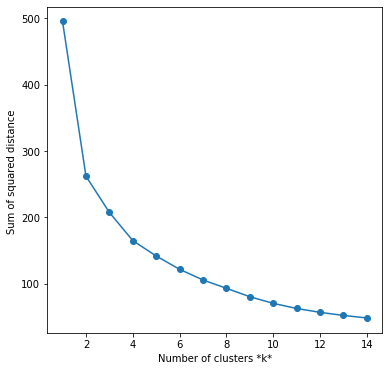

In [19]:
sse = []
list_k = list(range(1, 15))
X = datas.values
Clus_dataSet = StandardScaler().fit_transform(X)

for k in list_k:
    km = KMeans(init = "k-means++", n_clusters = k, n_init = 50)
    km.fit(Clus_dataSet)
    sse.append(km.inertia_)
    
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*');
plt.ylabel('Sum of squared distance ');    

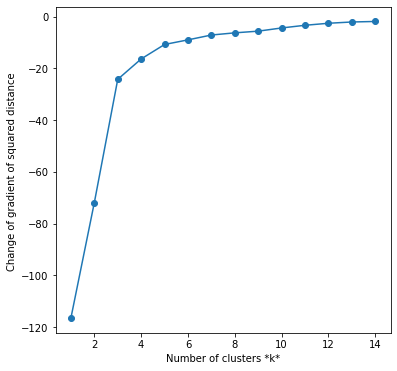

In [33]:
a=np.gradient(sse,2)
plt.figure(figsize=(6, 6))
plt.plot(list_k, a, '-o')
plt.xlabel(r'Number of clusters *k*');
plt.ylabel('Change of gradient of squared distance ');  

In [34]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 50)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[3 2 1 0 1 3 1 0 0 0 3 1 0 1 3 1 2 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 3 1 0
 0 0 2 0 0 1 0 0 2 3 0 0 0 0 0 0 0 0]


In [35]:
datas["Clus_km"] = labels
datas.head(5)

,Restaurant,Fun,Shoplots,Workplace,Condo,HDB,Landed,Others,Total_Housing,Clus_km
ANG MO KIO,33.0,42.0,34.0,38.0,11920.0,145110.0,16410.0,1330.0,174770.0,3
BEDOK,83.0,68.0,33.0,29.0,48690.0,193060.0,45160.0,2840.0,289750.0,2
BISHAN,22.0,27.0,17.0,16.0,14210.0,65130.0,10770.0,580.0,90690.0,1
BOON LAY,1.0,10.0,9.0,11.0,0.0,0.0,0.0,0.0,0.0,0
BUKIT BATOK,40.0,43.0,25.0,41.0,24570.0,108240.0,5620.0,840.0,139270.0,1


In [36]:
datas.sort_values(by=['Clus_km'],ascending=False)

,Restaurant,Fun,Shoplots,Workplace,Condo,HDB,Landed,Others,Total_Housing,Clus_km
ANG MO KIO,33.0,42.0,34.0,38.0,11920.0,145110.0,16410.0,1330.0,174770.0,3
YISHUN,45.0,71.0,51.0,35.0,8970.0,186770.0,5290.0,950.0,201980.0,3
BUKIT MERAH,42.0,71.0,39.0,39.0,9100.0,144550.0,520.0,1670.0,155840.0,3
SENGKANG,28.0,60.0,40.0,32.0,11340.0,193280.0,1570.0,490.0,206680.0,3
CHOA CHU KANG,33.0,48.0,39.0,10.0,15500.0,155870.0,2550.0,420.0,174340.0,3
HOUGANG,43.0,71.0,48.0,46.0,21630.0,173930.0,22610.0,4160.0,222330.0,3
JURONG WEST,51.0,129.0,97.0,25.0,12270.0,255650.0,4400.0,350.0,272670.0,2
WOODLANDS,21.0,96.0,63.0,37.0,10070.0,238570.0,620.0,1030.0,250290.0,2
TAMPINES,73.0,97.0,64.0,52.0,23540.0,231850.0,4630.0,1220.0,261240.0,2
BEDOK,83.0,68.0,33.0,29.0,48690.0,193060.0,45160.0,2840.0,289750.0,2


In [24]:
datas.to_csv('14 - final.csv')

In [37]:
sortbycluster=datas.groupby('Clus_km').mean()
sortbycluster.sort_values(by=['Restaurant'],ascending=False)

,Restaurant,Fun,Shoplots,Workplace,Condo,HDB,Landed,Others,Total_Housing
Clus_km,,,,,,,,,
2,57.000000,97.500000,64.250000,35.750000,23642.500000,229782.500000,13702.500000,1360.000000,268487.500000
3,37.333333,60.500000,41.833333,33.333333,13076.666667,166585.000000,8158.333333,1503.333333,189323.333333
1,31.153846,44.307692,28.769231,32.384615,13244.615385,89105.384615,6936.923077,993.076923,110280.000000
0,12.000000,15.468750,9.937500,12.718750,3369.687500,2668.437500,1785.312500,265.625000,8089.062500


In [ ]:
# 1:6, 1:8, 2:7, 2:8, 5:6, 

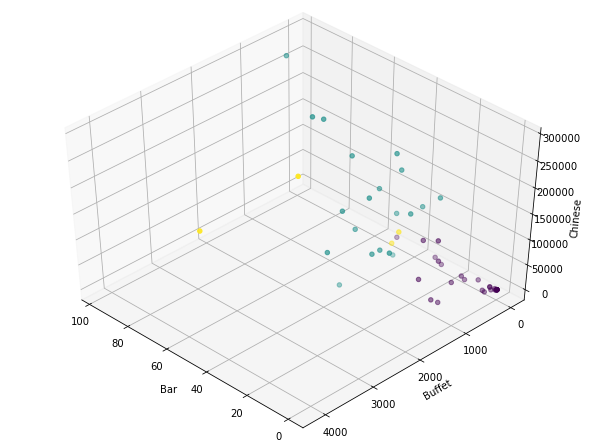

In [423]:
fig = plt.figure(5, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=45, azim=135)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Bar')
ax.set_ylabel('Buffet')
ax.set_zlabel('Chinese')

ax.scatter(X[:, 2], X[:, 7], X[:, 8], c= labels.astype(np.float))